
# Assignment 2: Hyperparameter Optimizartion For The Human Freedom Index Model

This notebook contains a set of exercises that will guide you through the different steps of this assignment. As in Assignment 1, solutions need to be code-based, _i.e._ hard-coded or manually computed results will not be accepted. Remember to write your solutions to each exercise in the dedicated cells and to not modify the test cells. When you are done completing all the exercises submit this same notebook back to moodle in **.ipynb** format.

<div class="alert alert-success">

The <a href="https://www.cato.org/human-freedom-index/2021 ">Human Freedom Index</a> measures economic freedoms such as the freedom to trade or to use sound money, and it captures the degree to which people are free to enjoy the major freedoms often referred to as civil liberties—freedom of speech, religion, association, and assembly— in the countries in the survey. In addition, it includes indicators on rule of law, crime and violence, freedom of movement, and legal discrimination against same-sex relationships. We also include nine variables pertaining to women-specific freedoms that are found in various categories of the index.

<u>Citation</u>

Ian Vásquez, Fred McMahon, Ryan Murphy, and Guillermina Sutter Schneider, The Human Freedom Index 2021: A Global Measurement of Personal, Civil, and Economic Freedom (Washington: Cato Institute and the Fraser Institute, 2021).
    
</div>

<div class="alert alert-danger"><b>Submission deadline:</b> Sunday, February 12th, 23:55</div>

In [1]:
import numpy as np
import pandas as pd

<div class="alert alert-info"><b>Exercise 1</b>
    
Load the Human Freedom Index data from the link: https://github.com/jnin/information-systems/raw/main/data/hfi_cc_2021.csv in a DataFrame called ```df```. The following columns are redundant and should be dropped:
* ```year```
* ```ISO```
* ```countries```
* All columns containing the word ```rank``` 
* All columns containing the word ```score```

Then store the independent variables in a DataFrame called ```X``` and the dependent variable (```hf_quartile```) in a DataFrame called ```y```.
    
<br><i>[0.5 points]</i>
</div>
<div class="alert alert-warning">
Do not download the dataset. Instead, read the data directly from the provided link
</div>

In [2]:
# We create the dataframe directly from the download link and have a first display.

df=pd.read_csv("https://github.com/jnin/information-systems/raw/main/data/hfi_cc_2021.csv")
df.head()

year  countries  ISO                         region  hf_score  hf_rank  \
0  2019    Albania  ALB                 Eastern Europe      8.14     43.0   
1  2019    Algeria  DZA     Middle East & North Africa      5.26    154.0   
2  2019     Angola  AGO             Sub-Saharan Africa      6.09    129.0   
3  2019  Argentina  ARG  Latin America & the Caribbean      7.38     74.0   
4  2019    Armenia  ARM        Caucasus & Central Asia      8.20     40.0   

   hf_quartile  pf_rol_procedural  pf_rol_civil  pf_rol_criminal  ...  \
0          2.0               5.97          4.76             4.26  ...   
1          4.0               5.21          5.64             4.35  ...   
2          4.0               2.72          4.43             3.60  ...   
3          2.0               6.83          5.94             4.35  ...   
4          1.0                NaN           NaN              NaN  ...   

   ef_regulation_business_adm  ef_regulation_business_bureaucracy  \
0                        5.65                                6.67   
1                        4.22                                2.22   
2                        2.94                                2.44   
3                        2.71                                5.78   
4                        5.17                                5.56   

   ef_regulation_business_start  ef_regulation_business_bribes  \
0                          9.74                           6.24   
1                          9.31                           2.58   
2                          8.73                           4.70   
3                          9.58                           6.53   
4                          9.86                           6.96   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                              5.62                               7.18   
1                              8.77                               7.03   
2                              7.92                               6.78   
3                              5.73                               6.51   
4                              9.30                               7.04   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  
0                    6.85           7.70      7.81     31.0  
1                    5.69           5.84      4.90    162.0  
2                    5.59           5.97      5.50    153.0  
3                    6.14           5.99      5.50    153.0  
4                    7.32           7.82      8.03     15.0  

[5 rows x 125 columns]

We drop the complete columns with a simple drop, and the columns containing a word using regular expressions or regex inside a filter.

In [3]:
df.drop(["year", "ISO", "countries"], axis=1, inplace=True)
df.drop(df.filter(regex='score|rank').columns, axis=1, inplace=True)

print(f' The number of columns dropped is {125-df.shape[1]}, we have now {df.shape[1]} features and {df.shape[0]} instances.')

 The number of columns dropped is 11, we have now 114 features and 1980 instances.


As we will be asked to create a logistic regression model that does not accept missing values in the target variable or in the features matrix, we will start by removing all NaN in the target variable, as this one remain untouched in transformations carried out inside a ```Pipeline```.

In [4]:
df.dropna(subset=["hf_quartile"], inplace=True)

print(f'Out of 1980 instances, by removing target feature NaN, we are left with {df.shape[0]}')

Out of 1980 instances, by removing target feature NaN, we are left with 1867


In [5]:
# Then, we create our target array and features matrix.

X=df.drop("hf_quartile", axis=1)
y=df["hf_quartile"]

In [6]:
# LEAVE BLANK

In [7]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 2</b>
    
Write the code to create a ```Pipeline``` consisting of a ```SimpleImputer``` with the most frequent strategy, a ```OneHotEncoder``` for the categorical variables, a standard scaler, and a logistic regression model with the solver ```saga``` and ```max_iter```2000. Store the resulting pipeline in a variable called ```pipe```.
    
<br><i>[1 point]</i>
</div>
<div class='alert alert-warning'>

Not all the attributes are categorical. Ensure that all non-categorical attributes remain intact.
</div>

We will import all necessary Scikit-learn classes we will use, as well as a library to hide warning messages to enhance the code appearance.

In [8]:
# We will import all the necessary Scikit-learn variables that we may need.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# And a warning hider to make our code cleaner.

import warnings
warnings.filterwarnings("ignore")

Because we are asked to left the non-categorical variables untouched, we will make sure to first identify categorical and non-categorical variables. We do so by means of a simple function, which displays what we saw in Assignment 1: the only categorical feature is ```region```.

In [9]:
def separate_vars(df):
    # Create a list of all variables in the dataframe
    all_vars = list(df.columns)

    # Create a list of numerical variables
    num_vars = list(df._get_numeric_data().columns)

    # Create a list of categorical variables
    cat_vars = [var for var in all_vars if var not in num_vars]

    return cat_vars, num_vars

separate_vars(df=X)

(['region'],
 ['pf_rol_procedural',
  'pf_rol_civil',
  'pf_rol_criminal',
  'pf_rol',
  'pf_ss_homicide',
  'pf_ss_disappearances_disap',
  'pf_ss_disappearances_violent',
  'pf_ss_disappearances_organized',
  'pf_ss_disappearances_fatalities',
  'pf_ss_disappearances_injuries',
  'pf_ss_disappearances_torture',
  'pf_ss_killings',
  'pf_ss_disappearances',
  'pf_ss',
  'pf_movement_vdem_foreign',
  'pf_movement_vdem_men',
  'pf_movement_vdem_women',
  'pf_movement_vdem',
  'pf_movement_cld',
  'pf_movement',
  'pf_religion_suppression',
  'pf_religion_freedom_vdem',
  'pf_religion_freedom_cld',
  'pf_religion_freedom',
  'pf_religion',
  'pf_assembly_entry',
  'pf_assembly_freedom_house',
  'pf_assembly_freedom_bti',
  'pf_assembly_freedom_cld',
  'pf_assembly_freedom',
  'pf_assembly_parties_barriers',
  'pf_assembly_parties_bans',
  'pf_assembly_parties_auton',
  'pf_assembly_parties',
  'pf_assembly_civil',
  'pf_assembly',
  'pf_expression_killed',
  'pf_expression_jailed',
  'pf

We create for ```region``` the ```ColumnTransformer```, with the necessary transformations that we'll put inside our final pipeline. Order matters in this case, so we will create an inner pipeline with the ```most_frequent``` imputation first and the encoding. 

We also use inside such ```ColumnTransformer``` an imputer for the remaining numerical features in X, as ```LogisticRegression``` does not accept missing values, which makes this a necessary step.

In [10]:
# We instantiate all classes and the ColumnTransformer with the necessary of them inside it.

cat_imp=SimpleImputer(strategy="most_frequent")
num_imp=SimpleImputer(strategy="median")
onehot=OneHotEncoder(sparse=False)
inner_steps=[("simple_imputer", cat_imp), ("onehot", onehot)]
inner_pipe=Pipeline(inner_steps)
transformer=ColumnTransformer([("innerpipeline", inner_pipe, [X.columns.get_loc("region")]), 
                                   ("num_imputer", num_imp, list(range(1,(X.shape[1]-1))))], 
                                  remainder="passthrough")


# Then, we create the definitive pipeline, scaling all different values with StandardScaler and using the
# logistic regression with the solver saga and max_iter 2000.

scaler=StandardScaler()
logreg=LogisticRegression(solver="saga", max_iter=2000)
steps=[("transformer", transformer), ("scaler", scaler), ("logreg", logreg)]
pipe=Pipeline(steps)

In [11]:
# LEAVE BLANK

In [12]:
# LEAVE BLANK

In [13]:
# LEAVE BLANK

In [14]:
# LEAVE BLANK

In [15]:
# LEAVE BLANK

In [16]:
# LEAVE BLANK

In [17]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 3</b>

Write the code to estimate the performance of the model using cross-validation with **three** stratified folds. Store the five test score values in a dictionary called ```fold_scores```.
    
<br><i>[1 point]</i>
</div>

As we are asked to evaluate only the performance of the model, we assume using the whole dataset may be valuable, more than just using a train split. Therefore, we will proceed with this approach, although in the next exercise we will perform the split for a complete predictive power evaluation against unseen data (or holdout test set).

In [18]:
scores=cross_val_score(pipe, X, y, cv=3)

# We then create the dictionary we are asked to provide with the 3 fold scores.

fold_scores={}

i=1
for score in scores:
    fold_scores[f'score_cross_val_{i}']=score
    i=i+1

fold_scores

{'score_cross_val_1': 0.9020866773675762,
 'score_cross_val_2': 0.9469453376205788,
 'score_cross_val_3': 0.9003215434083601}

In [ ]:
stop_patchers(patchers)
call_order = ['estimator', 'X', 'y', 'groups', 'scoring', 'cv', 'n_jobs', 'verbose', 'fit_params', 'pre_dispatch', 'error_score']
check_args({'estimator': pipe, 'X': X, 'y': y, 'cv': 3}, call_order, mocks)

In [19]:
# LEAVE BLANK

In [20]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 4</b>

    
Write the code to create a GridSearchCV object called ```grid``` and fit it using **only three folds**. The grid search object must include the previous pipeline and test the following hyperparameters:
* ```penalty``` : ['l1', 'l2']
* ```C``` : [0.1,10]

Finally, store the best achieved score (accuracy) in a variable called ```score```.

<br><i>[2.5 points]</i>
</div>

<div class='alert alert-warning'>

Use train and test datasets correctly.
</div>

We start by doing the ```train_test_split``` with the default 25% of test size as we are not being said otherwise. We then write down the dictionary needed for the specifications given, which we will
impute inside the ```GridSearchCV``` variable (```grid```) we will create. Then, we will create the variable ```score```, with other print commands.

In [21]:
# We perform the train_test_split, and perform a cross_val_score.

X_train, X_test, y_train, y_test=train_test_split(X, y)

# We write down the dictionary needed for the specifications given, which we will impute inside the
# GridSearchCV variable (grid) we will create with our pipe.

param_grid={"logreg__penalty": ['l1', 'l2'], "logreg__C": [0.1, 10]}
grid=GridSearchCV(pipe, param_grid, cv=3, n_jobs=-2)

In that sense, we must be able to comprehend that ``grid.best_score_`` returns us the average accuracy metric of the cross-validation model of 3 folds with the best hyperparameters applied (so, it allows us to see the generalization power of the model), while ```grid.best_estimator_.score(X_test, y_test)``` returns us the accuracy value against the holdout test set (so, it gives us an image of the predictive power on unseen data of the model).

***Expected runtime: 16 seconds (```n_jobs=-2``` parameter applied for more CPU usage and runtime reduction)***

In [22]:
# We then fit the model and print best parameters found and the best_score + best_estimator score.

grid.fit(X_train, y_train)
print(grid.best_params_)
grid.best_score_
score=grid.best_estimator_.score(X_test, y_test)
print(f' This is the cross-validation average accuracy score with GridSearchCV applied: {grid.best_score_.round(6)}')
print(f' This is the accuracy when compared with the holdout test set: {grid.best_estimator_.score(X_test, y_test).round(6)}')

{'logreg__C': 0.1, 'logreg__penalty': 'l2'}
 This is the cross-validation average accuracy score with GridSearchCV applied: 0.935713
 This is the accuracy when compared with the holdout test set: 0.944325


In [23]:
# LEAVE BLANK

In [24]:
# LEAVE BLANK

In [25]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 5</b>
    
The previous grid search is incomplete because it only optimizes the hyperparameters of the logistic regression model. Now repeat the same process but testing parameters of all the steps of the pipeline. This exercise is open. You can use any hyperparameter from the scaler, imputer, transformer, encoder, or model. Do not limit yourself to linear models.

<br><i>[5 points]</i>
</div>

Let's assume that our variable ```df```, with no missing values in the target feature ```hf_quartile``` and with the redundant and unique identifiers variables dropped (so, 114 features and 1867 instances) is still the initial dataframe to use.

Although it is understood that many models (like a ```DecisionTreeClassifier```) can operate with missing values or even ignore them, for convenience, we will replace them so that such ```df``` can be more easily applied to multiple models.

In [26]:
df.shape

(1867, 114)

## Approach followed ##

We will tackle this Exercise 5 in 2 big blocks.

1. **General preprocessing**

   1. We tackle in combination multicollinearity of above 90% in Pearson score, removing those variables with less than 1.0 of coefficients (based on the ```GridSearchCV``` K=3 Logistic Regression model of last exercise). By doing so, we remove linearlly related features that may not be big predictors according to the model, and simplify the model with sense and in a conservative way.
  

 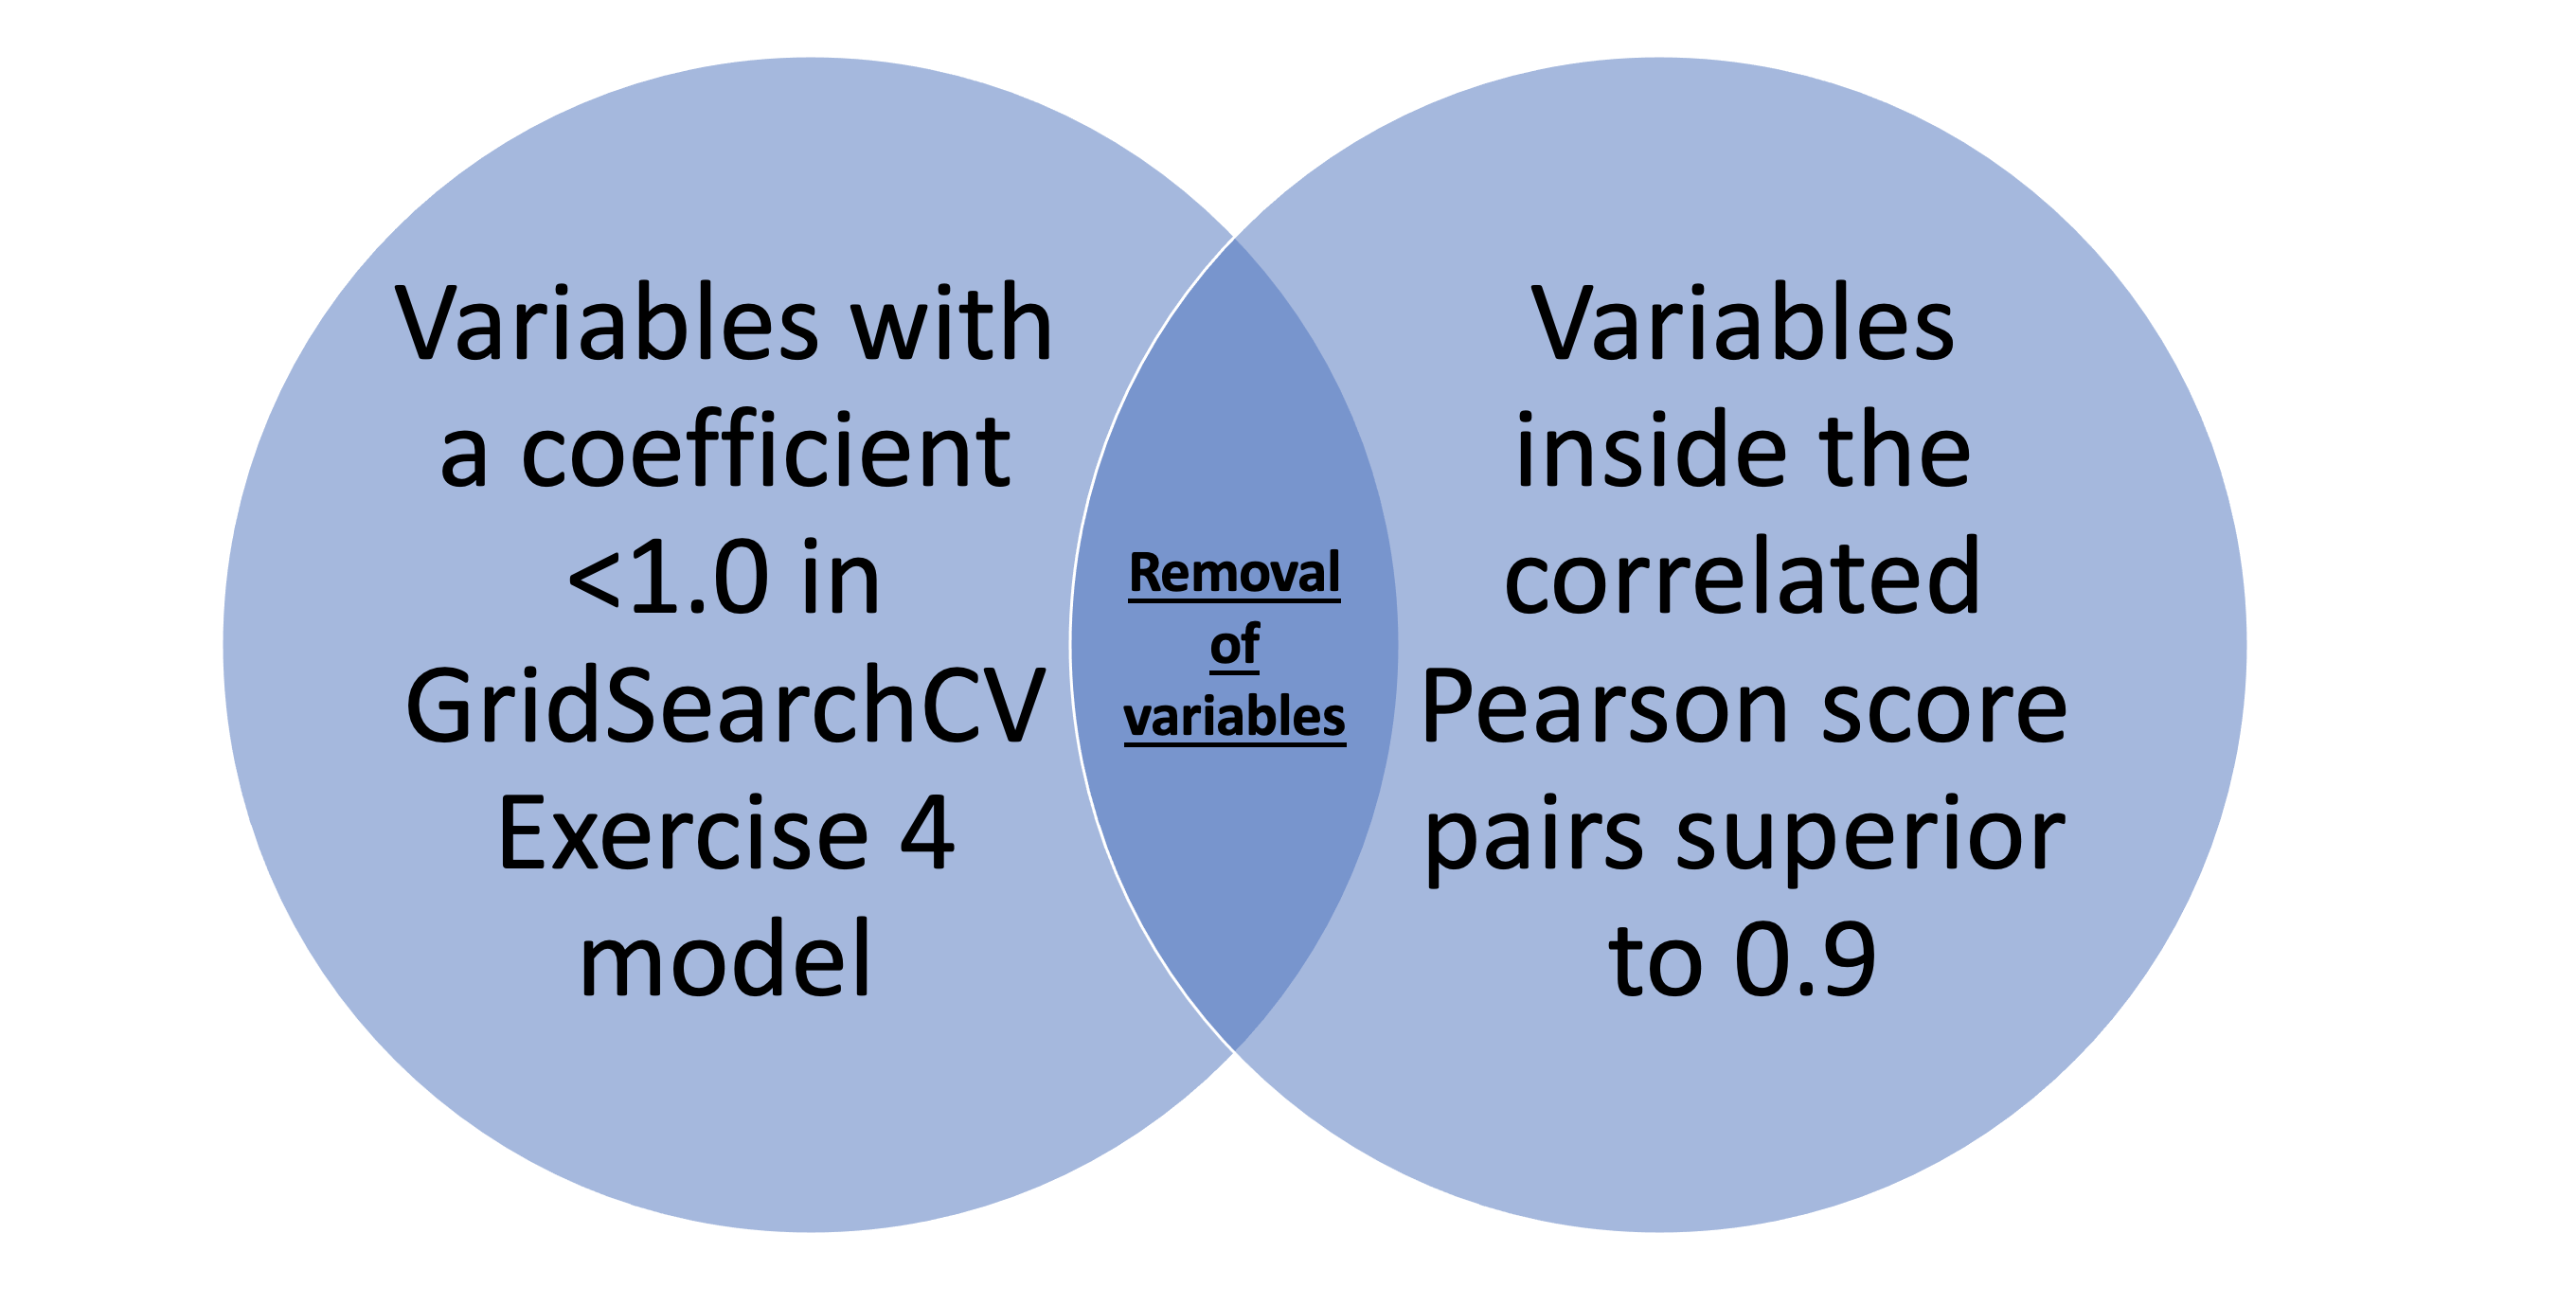
 
 
As a second step, we create an alternative dataset (```df_nonextreme```) dropping some extreme instances to apply to models that are sensitive to outliers, like a ```DecisionTreeClassifier```, ```RandomForest``` or ```KNeighborsClassifier```, in order to make them more resilient. The approach is clearly explained before the second part.

2. **GridSearchCV and optimization of parameters with complete ```ClassificationReport``` for:** 

    1. K-Nearest-Neighbors (KNN)
    2. Logistic Regression
    3. Decision Tree
    4. Random Forest
    
    

3. **Graphical display of results and best model**

## 1. Feature importance + Multicollinearity for feature selection##

We will start assessing our previous model feature importance. The underlying reason is that this will better assist us to determine variables to drop that may simplify the model, paired up with the subsequent multicollinearity analysis we will carry out. In order to better visualize the coefficients, we will create a DataFrame and a histogram to assess the threshold to consider for feature importance.

In [27]:
# Get the best estimator from the grid search
best_model = grid.best_estimator_

# Get the coefficients from the Logistic Regression model
importances = np.abs(best_model.named_steps['logreg'].coef_[0])

# Get the variable names from the training data
variable_names = X_train.columns

# Create a list of the variable names and feature importances
importance_list = [(variable_names[i], importances[i]) for i in range(len(variable_names))]

# Sort the list by feature importance in descending order
importance_list = sorted(importance_list, key=lambda x: x[1], reverse=True)

# Create a dataframe storing in a visual and ordered way the variables and its coeffcients. 

variables=[]
coefficients=[]
for block in importance_list:
    variables.append(block[0])
    coefficients.append(block[1])

importance=pd.DataFrame({"features": variables, "coefficients":coefficients})
importance

features  coefficients
0           pf_expression_freedom_cld      0.436414
1                pf_ss_disappearances      0.434611
2             pf_assembly_freedom_bti      0.431363
3                         pf_identity      0.386201
4             ef_government_transfers      0.385337
..                                ...           ...
108  ef_regulation_labor_conscription      0.010846
109              ef_regulation_credit      0.010710
110          pf_movement_vdem_foreign      0.004988
111          ef_government_tax_income      0.000605
112              ef_legal_enforcement      0.000322

[113 rows x 2 columns]

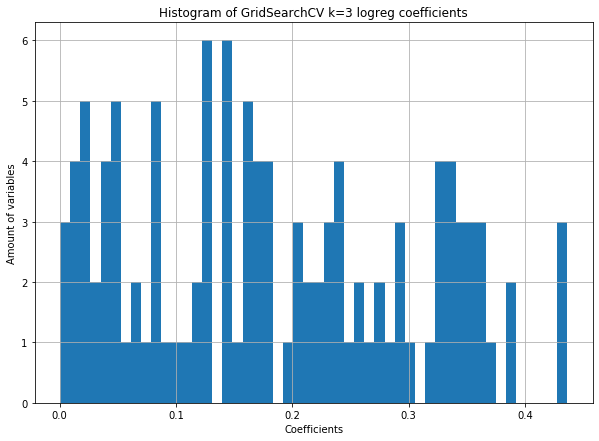

Based on our GridSearchCV of a Logistic Regression, we have 64 features with coefficients <1.


In [29]:
# We plot the histogram of values for a proper visualization and determination of importance threshold.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7)) # increase the figure size
importance["coefficients"].hist(bins=50)
plt.xlabel("Coefficients")
plt.ylabel("Amount of variables")
plt.title("Histogram of GridSearchCV k=3 logreg coefficients")
plt.show()

# Based on that, we create a list of variables with less than 1 in terms of importance.

unimportant=list(importance[importance["coefficients"]<0.2]["features"])

print(f'Based on our GridSearchCV of a Logistic Regression, we have {len(unimportant)} features with coefficients <1.')

### Multicollinearity against feature importance ###

Now, we combine the variables obtained above with ones inside the pairs of correlated variables in Pearson score >90%. We do not display it graphically because of the size of features, although the final combination of correlated features >90% and feature coefficient below 1.0 lead us to drop around 25 and 30 features (depending on the previous model evaluation).

In [30]:
# We drop first temporarily "region" to simplify our correlation analysis for multicollinearity spotting.

df1=df.drop("region", axis=1)

In [31]:
#We create the correlation matrix numerically without displaying it.

corr_matrix=df1.corr().round(2)

correlated_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# get the pairs with correlation greater than a threshold (here, 0.9).
threshold = 0.9
correlated_pairs = correlated_pairs[correlated_pairs > threshold]

# drop the diagonal values, with perfect correlation with the own variable.
correlated_pairs = correlated_pairs[correlated_pairs != 1]

# display the correlated pairs
print(correlated_pairs)

pf_identity_inheritance            pf_identity_inheritance_daughters    0.98
pf_identity_inheritance_widows     pf_identity_inheritance              0.98
pf_womens                          pf_identity                          0.98
pf_identity                        pf_womens                            0.98
pf_identity_inheritance_daughters  pf_identity_inheritance              0.98
                                                                        ... 
pf_expression                      pf_assembly                          0.91
pf_rol                             ef_legal_courts                      0.91
pf_expression_media                pf_expression                        0.91
pf_assembly                        pf_expression                        0.91
pf_expression_gov                  pf_expression                        0.91
Length: 70, dtype: float64


In [32]:
# Then, we treat this Series Index as a list, join them together and take out only those features that are
# unique, which can be carried out with the set() method.

correlated_variables=list(correlated_pairs.index)
correlated_variables

variables_repeated=[]
for pair in correlated_variables:
    variables_repeated.append(pair[0])
    variables_repeated.append(pair[1])

multicollinearity=list(set(variables_repeated))

print('We have {} correlated variables with Pearson >90%.'.format(len(multicollinearity)))

We have 44 correlated variables with Pearson >90%.


In [33]:
# Next step is based on taking out of the multicollinearity list those variables that are correlated
# in a high degree and that have a low importance. 

rubbish_variables=list(set(multicollinearity) & set(unimportant))
rubbish_variables

print(f'Variables >0.9 of correlation and <1 of coefficient are dropped, eliminating {len(rubbish_variables)}.')

Variables >0.9 of correlation and <1 of coefficient are dropped, eliminating 25.


In [34]:
# Finally, we drop them.

df.drop(rubbish_variables, axis=1, inplace=True)

print(f'From 114 variables, we end up with {df.shape[1]}.')

From 114 variables, we end up with 89.


### Alternative dataset: Removal of continuous features extreme instances ###

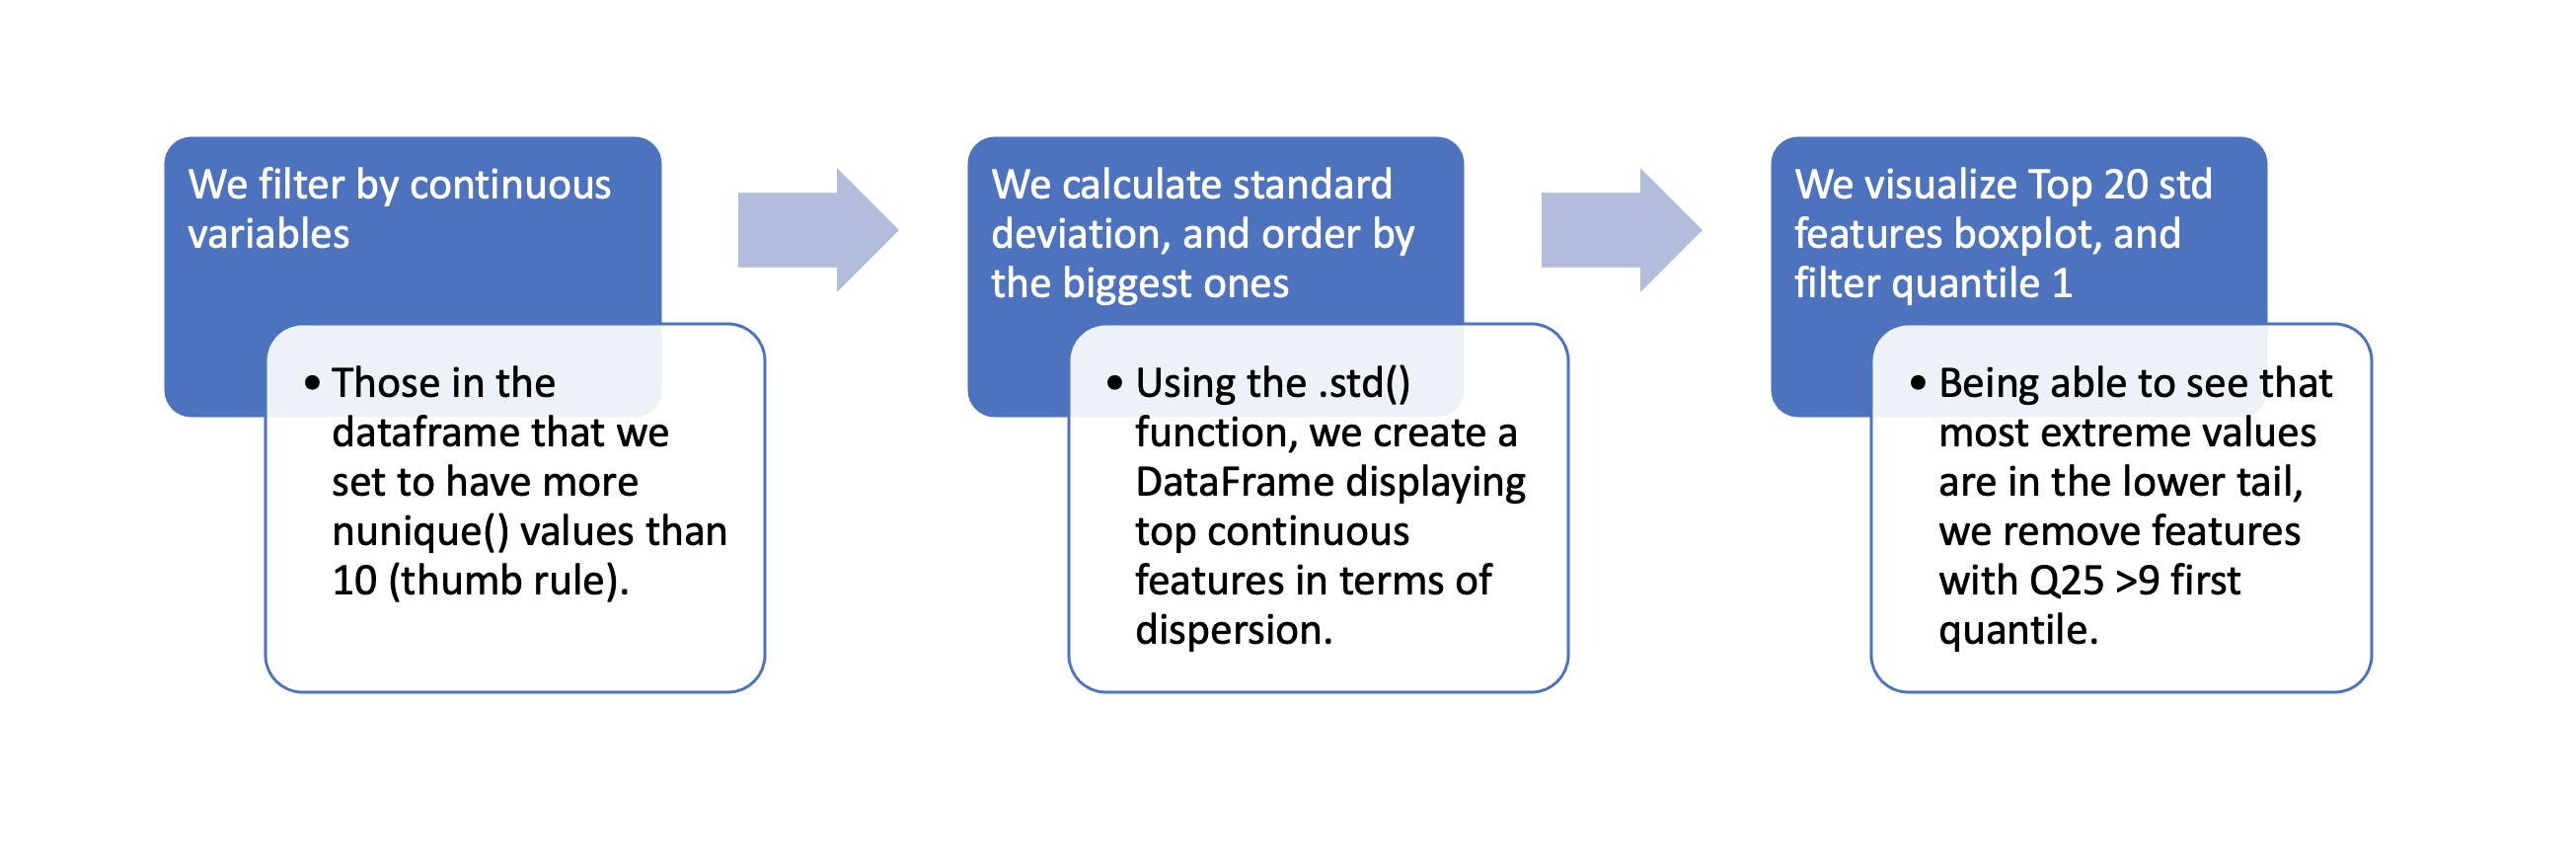

Models like the ```DecisionTreeClassifier``` are sensitive to outliers. Just to make sure sensible models are not affected by extreme instances, we will remove extreme values, considering the workflow explained above. We use ```nunique``` inside a loop to spot those numerical features that are continuous (we use as a rule of thumb having more than 10 unique values).

For testing between a dataset with outliers and without, we will store this removed outliers dataset in a variable called ```df_nonextreme```, and decide whether this one or ```df``` are better for the type of model used and its sensitivity to extreme values.

In [35]:
# We spot continuous features and store them in an ordered DataFrame.

continuous=[]
for feature in df.columns:
    if df[feature].nunique()>10:
        continuous.append(feature)
    else:
        continue

# We create now the DataFrame of continous variables standard deviation.
        
continuous_std=[]
for continuity in continuous:
    continuous_std.append((f'{continuity}: {df[continuity].std()}'))

continuous_feature=[]
continuous_std_dev=[]

for element in continuous_std:
    continuous_feature.append(element.split(": ")[0])
    continuous_std_dev.append(element.split(": ")[1])

STD=pd.DataFrame({"continuous_feature": continuous_feature, "continuous_std_dev": 
              continuous_std_dev}).sort_values("continuous_std_dev", ascending=False)
STD["continuous_std_dev"]=STD["continuous_std_dev"].astype(float)
STD

continuous_feature  continuous_std_dev
48      ef_trade_movement_foreign            3.805202
50        ef_trade_movement_visit            3.535422
26      ef_government_enterprises            3.211480
16           pf_expression_jailed            3.084354
59  ef_regulation_labor_dismissal            2.958426
..                            ...                 ...
63   ef_regulation_business_start            1.136564
46  ef_trade_regulatory_nontariff            1.090316
68                  ef_regulation            1.034680
8            pf_movement_vdem_men            1.009131
43          ef_trade_tariffs_mean            0.995886

[69 rows x 2 columns]

We will examine, out of the top 20 standard deviation of continuous features, how are the values distributed in a boxplot. From them, we can see that extreme values are generally in the lower tail. 

In [36]:
# A removal of all quantile 95 would drop too much data. Let's check the top 20 features boxplot.

first_20_rows = STD.head(20).values.tolist()
top_20_STD=[]
for element in first_20_rows:
    top_20_STD.append(element[0])
top_20_STD

# Setting size and style of the plot
plt.figure(figsize=(20, 8), dpi=1000)
sns.set_context('paper', font_scale=1.5)

# Creating the boxplot
sns.boxplot(data = df[top_20_STD], orient="h")
plt.title('Top 20 std continuous features boxplots')
plt.show()

Having seen that, we will be conservative and drop only quantile 1 features in the lower tail, always when the quantile 25 limit is superior to 9 (we prefer to be conservative to not lose too much data).

In [37]:
# We define our alternative dataframe to which we will apply outlier changes.

df_nonextreme=df

# We will drop in this alternative dataframe the instances with the restriction mentioned.

for feature in top_20_STD:
    if df[feature].quantile(.25)>9: 
        lower_range= df[feature].quantile(.01)
        df_nonextreme=df_nonextreme[df_nonextreme[feature]>lower_range]
    else:
        continue

print(f'After dropping everything below Quantile 1 from top 20 features in std terms, we are left with {df_nonextreme.shape[0]} instances in df_nonextreme.')

After dropping everything below Quantile 1 from top 20 features in std terms, we are left with 1562 instances in df_nonextreme.


Before going to second part, we have 2 different datasets resulting from these processes:

1. **```df```**, which has variables with less than 0.2 coefficients in terms of importance and more than 0.9 correlations cleaned, but with all instances apart from the ones with  NaN's in ```hf_quartile```.


2. **```df_nonextreme```**, which has variables with the aforementioned coefficients and 0.9 Pearson score cleaned, as well as values quantile 1% removed from top 20 dispersed variables if quantile 25% superior to 9.

Both datasets will be used according to the sensitivity of the models to extreme values. In our case, ```df_nonextreme``` will be used for the ```DecisionTreeclassifier```, the ```RandomForestClassifier``` and ```KNeighborsClassifier```, as all models can be easily overfitted in the way they operate and we can help build more resilience to unseen data.

## 2. GridSearchCV and optimization of parameters with complete ClassificationReport ##

We will follow the same structure for the second fine-tuning of a ```LogisticRegression```, a ```K-Nearest-Neighbors```, a ```DecisionTreeClassifier``` and a ```RandomForestClassifier```:

1. Creation of target array and features matrix + ```train_test_split```.
2. Preprocessing function usage and ```Pipeline```instantiation.
3. First ```cross_val_score```.
4. ```GridSearchCV``` optimization and final metrics.

In order to simplify preprocessing steps, a creation of 2 functions returning the definitive pipe have been carried out: ```NONCART_preprocessing``` and ```CART_preprocessing```. The second one does not scale the features, as CART models can carry out with different dimensions their splits.

Also, an expected runtime is added with the usage of ```n_jobs=-2``` parameter in ```GridSearchCV```to better guide the correction.

In [38]:
# For plotting purposes, we will append the holdout test accuracy metrics in a list so that we can see
# which model is better in such dimension at the end.

models_scores=[] 

# Here, we create the aforementioned functions to simplify the Pipeline creations.

def NONCART_preprocessing(model):
    cat_imp=SimpleImputer(strategy="most_frequent")
    num_imp=SimpleImputer(strategy="median")
    onehot=OneHotEncoder(sparse=False)
    inner_steps=[("simple_imputer", cat_imp), ("onehot", onehot)]
    inner_pipe=Pipeline(inner_steps)
    scaler=StandardScaler()
    transformer=ColumnTransformer([("innerpipeline", inner_pipe, [X.columns.get_loc("region")]), 
                                   ("num_imputer", num_imp, list(range(1,(X.shape[1]-1))))], 
                                  remainder="passthrough")
    steps=[("transformer", transformer), ("scaler", scaler), ("model", model)]
    pipe=Pipeline(steps)
    return pipe


# In the one for CART models, scaling is taken out to reduce a bit complexity.

def CART_preprocessing(model):
    cat_imp=SimpleImputer(strategy="most_frequent")
    num_imp=SimpleImputer(strategy="median")
    onehot=OneHotEncoder(sparse=False)
    inner_steps=[("simple_imputer", cat_imp), ("onehot", onehot)]
    inner_pipe=Pipeline(inner_steps)
    scaler=StandardScaler()
    transformer=ColumnTransformer([("innerpipeline", inner_pipe, [X.columns.get_loc("region")]), 
                                   ("num_imputer", num_imp, list(range(1,(X.shape[1]-1))))], 
                                  remainder="passthrough")
    steps=[("transformer", transformer), ("model", model)]
    pipe=Pipeline(steps)
    return pipe

### A. Second Logistic Regression fine tune ###

**dataset of reference: ```df```**

As we know from the previous exercises, this model does not accept missing values, as it builds upon a linear regression. Also, multicollinearity does harm the model. We have seen that many variables are highly correlated, but we prioritised striking also a balance with not losing too much information. As the model is sensitive to different scales in its coefficients, we will also scale the variables as we did.


**Step 1. Creation of target array and features matrix + ```train_test_split```.**

In [39]:
# In this case, X and y are the ones defined in the previous exercise. We'll only add a random_state to make
# our results repeatable downstream in the train_test_split.

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

**Step 2. Preprocessing function and ```Pipeline``` instantiation.**

We call the function ```NONCART_preprocessing``` and use ```logreg```, already defined in Exercise 2 as a parameter to have the our ```pipe```.

In [40]:
# We call the function, and instantiate the resulting pipe with the logreg instantiated in Exercise 2.

pipe=NONCART_preprocessing(logreg)

**Step 3. In this case, we will jump directly to the ```GridSearchCV```, as the first cross_validation score has already been carried out in Exercise 3.**

We try out different hyperparameters like the penalties for overfitting extended to ```elasticnet```, the usage of an ```intercept``` in the decision function, or the scaler with mean centering the data before scaling.

***Expected runtime:  1:07 minutes (```n_jobs=-2``` parameter applied for more CPU usage and runtime reduction)***

In [41]:
# We define in a dictionary the different hyperparameters to test and instantiate the GridSearchCV.

param_grid={"model__penalty": ['l1', 'l2', 'elasticnet'], "model__C": [0.1, 2],
           "transformer__num_imputer__strategy": ["mean", "median"], "model__max_iter":[100, 2000], 
           "model__fit_intercept":[True, False], "scaler__with_mean": [True, False]}

grid=GridSearchCV(pipe, param_grid, cv=3, n_jobs=-2)

# We then fit the model and print best parameters found and the best_score + best_estimator score.

grid.fit(X_train, y_train)
print(grid.best_params_)
grid.best_score_
score=grid.best_estimator_.score(X_test, y_test)
print(f' This is the cross-validation average accuracy score with GridSearchCV applied: {grid.best_score_.round(6)}')
print(f' This is the accuracy when compared with the holdout test method {grid.best_estimator_.score(X_test, y_test).round(6)}')
models_scores.append(score)

{'model__C': 0.1, 'model__fit_intercept': True, 'model__max_iter': 2000, 'model__penalty': 'l2', 'scaler__with_mean': True, 'transformer__num_imputer__strategy': 'mean'}
 This is the cross-validation average accuracy score with GridSearchCV applied: 0.937854
 This is the accuracy when compared with the holdout test method 0.933619


It can be seen how many times we are prompted to choose the mean over the median, to have an intercept in the model or to center the data before scaling, among others. 

**Disclaimer: this evaluation may have little changes based on the exercise 4 model that affect features inclusion.**

We will do one last check: the breakdown for each category of the target feature, which looks good enough at the expense of not having a business purpose (nearly all metrics are generally above > 0.9)

In [42]:
y_pred=grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.93      0.93       120
         2.0       0.87      0.90      0.88       114
         3.0       0.96      0.92      0.94       118
         4.0       0.98      0.98      0.98       115

    accuracy                           0.93       467
   macro avg       0.93      0.93      0.93       467
weighted avg       0.93      0.93      0.93       467



### B. K-Nearest-Neighbors (KNN) ###

**dataset of reference: ```df_nonextreme```**

This ML model does not support missing values, and as it calculates distances for finding the closest neighbors and defining an area of decision for classification, normalization is needed as a data pre-processing step for avoiding large scales affecting the model. Also, as outliers can affect the classification zones, we will rely on the elimination of extreme instances in ```df_nonextreme```.

**Step 1. Creation of target array and features matrix + ```train_test_split```.**

In [43]:
# We redefine the target array and features matrix as the dataset of reference changes, as well as the split.

X=df_nonextreme.drop("hf_quartile", axis=1)
y=df_nonextreme["hf_quartile"]

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

**Step 2. Preprocessing function and pipe instantiation.**

We keep the same approach as before, therefore, we call our function ```NONCART_preprocessing()``` to make sure we instantiate correctly the pipe for this new model. We set ```n_neighbors``` parameter in this case to 2.

In [44]:
# We instantiate our pipe with our KNN model.

knn=KNeighborsClassifier(n_neighbors=2)
pipe=NONCART_preprocessing(knn)

**Step 3. First ```cross_val_score```**

We apply a ```cross_val_score``` of 3 folds, following same guidelines as the ones used for Exercise 3.

In [45]:
# Now, we calculate our first cross_val_score, and store the 3 folds again in a dictionary.

scores=cross_val_score(pipe, X, y, cv=3)

fold_scores={}
i=1
for score in scores:
    fold_scores[f'score_cross_val_{i}']=score
    i=i+1

fold_scores

{'score_cross_val_1': 0.8848368522072937,
 'score_cross_val_2': 0.9155470249520153,
 'score_cross_val_3': 0.85}

**Step 4. ```GridSearchCV``` optimization and final metrics.**

We will see if imputation of missing values by mean or knn predictions make more sense. Also, we will check different ```n_neighbors``` and the weights applied for the model, testing if closer points can have more influence. Lastly, we will check for different algorithms to compute nearest neighbors (bypassing ```brute```for the complexity it can add).

***Expected runtime: 27 seconds***

In [46]:
# We write down the dictionary with hyperparameters options we will impute inside our grid.

param_grid={"transformer__num_imputer__strategy":["median", "mean", "knn"], "scaler__with_mean": [True, False],
            "model__n_neighbors": [2, 5, 7, 9], "model__weights":["uniform", "distance"], 
            "scaler__with_std":[True, False], "model__algorithm": ["auto", "ball_tree", "kd_tree"]}
grid=GridSearchCV(pipe, param_grid, cv=3)

# We then fit the model and print best parameters found and the best_score + best_estimator score.

grid.fit(X_train, y_train)
print(grid.best_params_)
grid.best_score_
score=grid.best_estimator_.score(X_test, y_test).round(6)
print(f' This is the cross-validation average accuracy score with GridSearchCV applied: {grid.best_score_.round(6)}')
print(f' This is the accuracy when compared with the holdout test method {grid.best_estimator_.score(X_test, y_test).round(6)}')
models_scores.append(score)

{'model__algorithm': 'auto', 'model__n_neighbors': 2, 'model__weights': 'distance', 'scaler__with_mean': True, 'scaler__with_std': False, 'transformer__num_imputer__strategy': 'mean'}
 This is the cross-validation average accuracy score with GridSearchCV applied: 0.924861
 This is the accuracy when compared with the holdout test method 0.951407


Although model may change every time we run the code due to Exercise 4 model impact on feature selection, many changes are somehow constant, like using distance as a weight (```knn_weights="distance"```, and not being uniform), and using mean as a numerical imputer and to center data before scaling.*

**Disclaimer: this evaluation may have little changes based on the exercise 4 model that affect features inclusion.**

If we go one step further, we can see that f1-score for all quartiles tend to show results surpassing 90% (always knowing that we need a business case for fully determining its goodness).

In [47]:
y_pred=grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       116
         2.0       0.91      0.94      0.92        97
         3.0       0.96      0.93      0.95       114
         4.0       0.95      0.98      0.97        64

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



### C. Decision Tree ###

**dataset of reference: ```df_nonextreme```**

By default, this ML model does not support missing values in Scikit-learn. It recursively splits the data into smaller subsets based on best Information gain, until a stopping criterion is met. As outliers can affect the model, we will reply with the elimination of the extreme instances done above. Further, in this model normalization is not needed because Decision trees are not sensitive to the scale of the features, as the splits in the tree are based on the relative ordering of the feature values and not their absolute values.

**Step 1. Creation of target array and feature matrix + ```train_test_split```.**

The dataset of reference is the same of the last model with ```df_nonextreme```, so no need to rewrite the code for target array and features matrix + splits.

**Step 2. Preprocessing function and ```Pipeline``` instantiation.**

We use the preprocessing function ```CART_preprocessing()```, which does not scale the features and reduces a bit computational complexity. We introduce some hyperparameters by default, which can be changed if the ```GridSearchCV```determines it.

In [48]:
clf = DecisionTreeClassifier(max_depth = 100, criterion = "entropy", splitter = "best", random_state=42)
pipe=CART_preprocessing(clf)

**Step 3. First ```cross_val_score```.**

Again, we run such cross-validation with X,y sets, in line with the approach of Exercise 3.

In [49]:
# Now, we calculate our first cross_val_score, and store the 3 folds again in a dictionary.

scores=cross_val_score(pipe, X, y, cv=3)

fold_scores={}
i=1
for score in scores:
    fold_scores[f'score_cross_val_{i}']=score
    i=i+1

fold_scores

{'score_cross_val_1': 0.8349328214971209,
 'score_cross_val_2': 0.8809980806142035,
 'score_cross_val_3': 0.8461538461538461}

**Step 4. ```GridSearchCV``` optimization and final metrics.**

We will try different hyperparamters, starting with the best possible imputer for numerical features and then, looking at the best split quality metric (```criterion```), pruning beforehand the depth for overfitting avoidance (```max_depth```), having a minimum samples to do a split (```min_samples_split```), splitting for certain levels of impurity decrease (```min_impurity_decrease```), and the number of features to consider for splitting (```model__max_features```).

***Expected runtime:  15 seconds (```n_jobs=-2``` parameter applied for more CPU usage and runtime reduction)***

In [50]:
# We write down the dictionary with hyperparameters options we will impute inside our grid.

param_grid={"transformer__num_imputer__strategy": ["median", "mean"], 
            "model__criterion": ["gini", "entropy", "log_loss"],
            "model__max_depth": [10, 20, 50, 100, 500], "model__min_samples_split": [2, 5, 8, 10], 
           "model__min_impurity_decrease": [0.0, 0.001, 0.01], "model__max_features": ['sqrt', 'log2', None]}

grid=GridSearchCV(pipe, param_grid, cv=3, n_jobs=-2)

# We then fit the model and print best parameters found and the best_score + best_estimator score.

grid.fit(X_train, y_train)
print(grid.best_params_)
grid.best_score_
score=grid.best_estimator_.score(X_test, y_test).round(6)
print(f' This is the cross-validation average accuracy score with GridSearchCV applied: {grid.best_score_.round(6)}')
print(f' This is the accuracy when compared with the holdout test method {grid.best_estimator_.score(X_test, y_test).round(6)}')
models_scores.append(score)

{'model__criterion': 'entropy', 'model__max_depth': 10, 'model__max_features': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_split': 5, 'transformer__num_imputer__strategy': 'mean'}
 This is the cross-validation average accuracy score with GridSearchCV applied: 0.885564
 This is the accuracy when compared with the holdout test method 0.887468


The model may change a bit each time we run the code due to Exercise 4 feature importance cascading down. In most of them, it can be seen that in ```model__max_depth```, this model performed better for depths of 20. Further,for ```model__min_samples_split```, this model performed better at 2 splits. It is better to impute the median on  numerical missing values, and not to put constraints in ```min_impurity_decrease``` or ```model_max_features```. Lastly, generally always a gini critterion for splits is used.*

**Disclaimer: this evaluation may have little changes based on the exercise 4 model that affect features inclusion.**

We can also see that in terms of individual class metrics, f1-scores tend to get get above 0.85, making it for the moment the worst of our models paired up with accuracy.

In [52]:
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       116
         2.0       0.80      0.91      0.85        97
         3.0       0.88      0.80      0.84       114
         4.0       0.89      0.91      0.90        64

    accuracy                           0.89       391
   macro avg       0.89      0.89      0.89       391
weighted avg       0.89      0.89      0.89       391



Just for visualization purposes of the depth and size of the tree, we display it so that it can be observed how big it may be with the best possible hyperparameters from the previous ```GridSearchCV```. This graph does not have the intention of being informative about the splits, but about the structure of the best tree with hyperparameters tested.

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
best_estimator = grid.best_estimator_
clf = best_estimator.named_steps['model']

plt.figure(figsize=(150,100), dpi=200)
plot_tree(clf, filled=True, fontsize=12)
plt.show()

### D. Random Forest ###

**dataset of reference: ```df_nonextreme```**

By default, this ML model does not support missing values in Scikit-learn. It can be seen as an extension of decision trees, where multiple trees are combined to form a more robust model. Outliers do not affect this model as much because having multiple decision trees, their effect get diluted more easily with bootstrapping and therefore, is more resilient against them than a single decision tree (we will apply a model with the alternative dataset, though). Further, as with decision trees and by extension, scaling is not strictly necessary for Random Forest models.

**Step 1. Creation of target array and feature matrix + ```train_test_split```.**

We use same target array and features matrix as the model before: no need to rewrite the code.

**Step 2. Preprocessing function and ```Pipeline``` instantiation.**

We call again the function, so that we do not miss any necessary class instantiation. We specify some default parameters and a ```random_state```to make results as repeatable as possible downstream.

In [54]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=100, random_state=42)
pipe=CART_preprocessing(rf)

**Step 3. First ```cross_val_score```**

We follow again Exercise 3 approach using all X,y sets.

In [55]:
# Now, we calculate our first cross_val_score, and store the 3 folds again in a dictionary.

scores=cross_val_score(pipe, X, y, cv=3)

fold_scores={}
i=1
for score in scores:
    fold_scores[f'score_cross_val_{i}']=score
    i=i+1

fold_scores

{'score_cross_val_1': 0.9040307101727447,
 'score_cross_val_2': 0.944337811900192,
 'score_cross_val_3': 0.9057692307692308}

**Step 4. ```GridSearchCV``` optimization and final metrics.**

We introduce many of the hyperparameters used in the decision tree, adding here the ```model__n_estimators```, to establish the number of trees we may need to optimize the metrics. In this specific case, not all the parameters we could include are used to avoid a segmentation fault error and taking into account the correction time of the assignment (we acknowledge more could be used, though).

***Expected runtime: 1:12 minutes (```n_jobs=-2``` parameter applied for more CPU usage and runtime reduction)***

In [56]:
# We write down the dictionary with hyperparameters options we will impute inside our grid.

param_grid={"transformer__num_imputer__strategy": ["median", "mean"], 
            "model__max_depth": [10, 20, 100], "model__min_samples_split": [2, 5],
            "model__max_features": ['sqrt', 'log2', None],
           "model__criterion": ["gini", "entropy"], "model__n_estimators": [100, 200]}

grid=GridSearchCV(pipe, param_grid, cv=3, n_jobs=-2)

# We then fit the model and print best parameters found and the best_score + best_estimator score.

grid.fit(X_train, y_train)
print(grid.best_params_)
grid.best_score_
score=grid.best_estimator_.score(X_test, y_test).round(6)
print(f' This is the cross-validation average accuracy score with GridSearchCV applied: {grid.best_score_.round(6)}')
print(f' This is the accuracy when compared with the holdout test method {grid.best_estimator_.score(X_test, y_test).round(6)}')
models_scores.append(score)

{'model__criterion': 'gini', 'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_split': 2, 'model__n_estimators': 100, 'transformer__num_imputer__strategy': 'median'}
 This is the cross-validation average accuracy score with GridSearchCV applied: 0.943638
 This is the accuracy when compared with the holdout test method 0.948849


Although the performance of the model may change due to the different feature importance in Exercise 4 model, we generally have repeatable results. As seen for ```model__max_depth```, model generally performs better comparatively for shorter depths of 10, and in the case of ```model__n_estimator```, 100 models are generally better. We also see the constraint of ```max_features``` with log, a ```min_sample_splits``` that is minimum, entropy as the best split quality criterion and median as the numerical imputer in most of the cases.*

**Disclaimer: this evaluation may have little changes based on the exercise 4 model that affect features inclusion.**

If we analyze the breakdown by each target feature category, we see that scores tend to be very high in this model, clearly enhancing the single decision tree tested before.

In [61]:
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       116
         2.0       0.90      0.95      0.92        97
         3.0       0.96      0.94      0.95       114
         4.0       0.98      0.95      0.97        64

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



### 3. **Graphical display of results and best model**

Finally, we can compare the different accuracies obtained in each of the four models optimized with ```GridSearchCV``` against the holdout test set. The final winner can be determined by running such cell in terms of accuracy vs holdout test sets. We must be cautios, though of business objectives that may need to further explore precision, recall and other metrics.

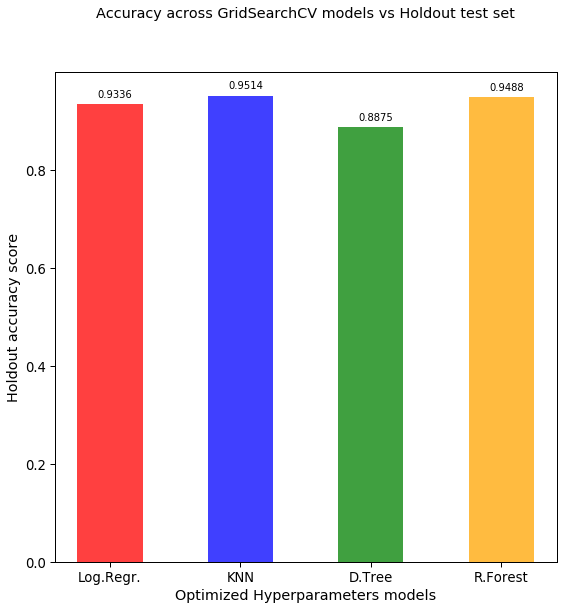

In [57]:
import matplotlib.pyplot as plt

values = models_scores
labels = ['Log.Regr.', 'KNN', 'D.Tree', 'R.Forest']
colors = ['red', 'blue', 'green', 'orange']

fig, ax = plt.subplots(figsize=(9, 9))
ax.bar(labels, values, color=colors, width=0.5, alpha=0.75)

for i, value in enumerate(values):
    ax.annotate(f'{round(value, 4)}', (i, value), fontsize=10, xytext=(5,5), 
                textcoords='offset points', ha='center', va='bottom')

plt.xlabel('Optimized Hyperparameters models')
plt.ylabel('Holdout accuracy score')
plt.title('Accuracy across GridSearchCV models vs Holdout test set', y=1.10)

plt.show()